In [1]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import re
from numpy import array

with open("C://Dr. Bhandarkar- Directed Study//nounVectorsFastext.txt",'r') as myfile:
    tempdata=myfile.read()
opbrack=[]
closebrack=[]
names=[]
for i in range(0,tempdata.__len__()):
    if tempdata[i]=='[':
        opbrack.append(i)
    if tempdata[i]==']':
        closebrack.append(i)
names=[]
str=tempdata.split(']')
for i in range(0,len(str)-1):
    a = re.findall(r'\w+', str[i])
    names.append(a[0])
    
count=0
data=[]
while count<opbrack.__len__():
    data.append(tempdata[opbrack[count]+1:closebrack[count]])
    count=count+1
count=0

while count<data.__len__():
    counter=0
    temp=data[count]
    while counter<data[count].__len__():
        if temp[counter]==" ":
            temp=temp.replace(temp[counter],"")
        data[count]=temp
        counter=counter+1
    count=count+1
count=0
while count<data.__len__():
    counter=0
    temp=data[count]
    while counter<data[count].__len__():
        if temp[counter]==",":
            temp=temp.replace(temp[counter]," ")
        data[count]=temp
        counter=counter+1
    count=count+1
count=0
X=[]
while count<data.__len__():
    temp=data[count]
    floats = [float(x) for x in temp.split()]
    X.append(floats)
    count=count+1
X=np.array(X)
Nc=range(1,79)
kmeans= [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

pl.plot(Nc,score)

pl.xlabel('Number of Clusters')

pl.ylabel('Score')

pl.title('Curve')

pl.savefig("Elbow Method Curve")

pl.show()

<Figure size 640x480 with 1 Axes>

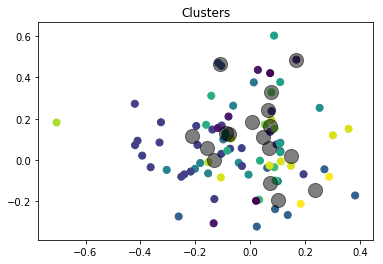

In [2]:
kmeans=KMeans(n_clusters=17)
kmeans.fit(X)
kmeansoutput=kmeans.predict(X)
pl.figure("Kmeans clustering")
plt.scatter(X[:, 0], X[:, 1], c=kmeansoutput, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Clusters')
plt.savefig('K-means Output')


In [4]:
labels=kmeans.labels_
print(labels)
clust=[]
clusternames=[]
listofl=[]
for i in range(0,4):
    arr=list(np.where(labels==i))
    clust.append(arr)
for i in range(0,len(clust)):
    temp=clust[i]
    for k in range(0,len(clust[i])):
        clusternames=[]
        for l in range(0,len(clust[i][k])):
            clusternames.append(names[clust[i][k][l]])
        listofl.append(clusternames)
print(listofl)

[ 3  3  6  3  3 11  5  7  6 11  3  7  9 14  7  4  3  3  3  8 14  7  3  5
  4 14  3  3  9  3  2 16  7 15  3  6  3  3  5 13  7  3  3  3 11  1  1 10
  5  3 14  8 10  5 15  9  3  0 16  5  3  3  1  5 15 10 15 13  9  8 15  1
 12  0 15  3 10  9  3  3]
[['bottl', 'wine'], ['fire', 'stop', 'traffic', 'parking'], ['surfboard'], ['person', 'tabl', 'cat', 'dog', 'bed', 'clock', 'umbrella', 'bench', 'kite', 'boat', 'chair', 'bird', 'orang', 'bear', 'couch', 'tie', 'cell', 'teddy', 'book', 'televis', 'suitcas', 'remot', 'backpack', 'handbag', 'hair']]
